시각화는 데이터를 파악할 때 매우 중요한 도구다. 파이썬은 Pandas, Matplotlib, Seaborn 등 여러 가지 시각화 라이브러리를 제공한다.  
Matplotlib와 Seaborn  역시 Pandas와 동일하게 pip를 이용해 설치하면 된다.  
```python
$ pip list | grep matplotlib
$ [링크 텍스트](https://)pip list | grep seaborn
```

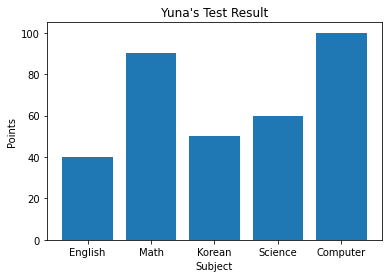

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig('./barplot.png')  # 그래프를 이미지로 출력
plt.show()                    # 그래프를 화면으로 출력

 이제 matplotlib를 이용해 자세히 살펴보며 앞의 그래프를 다시 그려보자.

 ### 1. 데이터 정의
 우선 모듈을 import하고 그래프로 그릴 데이터를 정의한다.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [40, 90, 50, 60, 100]

`%matplotlib inline` 은 IPython에서 사용하는 매직 메서드다.  
`Rich output` 에 대한 표현 방식인데, 그래프와 같은 그림, 소리 , 애니메이션과 같은 결과물을 `Rich output` 이라고 한다.  
IPython과 비슷한 환경인 Jupyter Notebook에서 이 명령어를 입력하면 그래프가 바로 출력된다.
- [IPython 매직 명령어 정리](https://studymake.tistory.com/601)

### 2. 축 그리기
그래프를 그리는 순서는 우선 하나의 그림(figure) 객체를 만들고 그 안에 하위 그래프(subplot)을 추가한다. 도화지에 축을 그리는 과정이다.

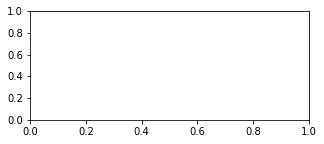

In [10]:
# 축 그리기
fig = plt.figure(figsize = (5, 2))  # 그래프 객체 생성
ax1 = fig.add_subplot(1, 1, 1)  # figure() 객체에 add_subplot 메서드를 이용해 축을 그린다.

figure() 객체에 `add_subplot` 메서드를 이용해 축을 그린다. `figsize` 인자 값을 주어 그래프의 크기를 정할 수 있다.  
도화지 안에는 축을 여러 개 그릴 수 있는데, `add_subplot` 의 인자로 조정한다.  
`1, 1, 1` 의 의미는 차례대로 `nrows, ncols, index` 에 해당한다.  
그래프 몇 개를 추가해보자.

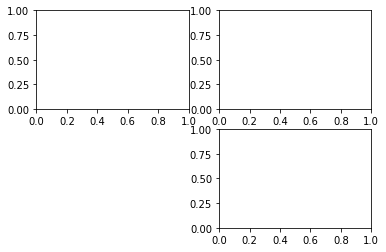

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

`2, 2` 는 2행 2열로 총 4개의 그래프를 그릴 수 있다는 뜻이며 마지막 인자로 위치를 지정해 줄 수 있다.  

### 3. 그래프 그리기
`bar()` 메서드를 이용해 막대 그래프를 그린다. 인자에 위에서 정의한 데이터들을 x, y 순으로 넣는다.

<BarContainer object of 5 artists>

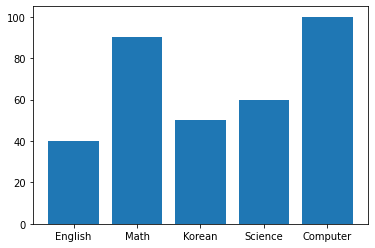

In [12]:
# 그래프 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(subject, points)

### 4. 그래프 요소 추가
x 라벨, y 라벨, 제목을 추가하기 위해서는 `xlabel()` 메서드와 `ylabel()` 메서드, `title()` 메서드를 이용한다.

Text(0.5, 1.0, "Yuna's Test Result")

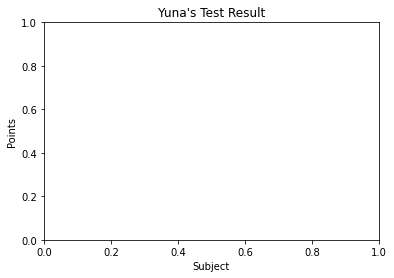

In [13]:
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

## 선 그래프 그리기

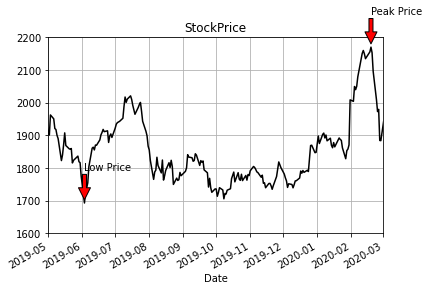

In [14]:
from datetime import datetime
import pandas as pd

# 그래프 데이터
csv_path = "/content/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석 달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
  ax.annotate(label, xy=(d, price.asof(d)+10),  # 주석을 달 좌표 (x, y)
              xytext=(d,price.asof(d)+100),     # 주석 텍스트가 위치할 좌표 (x, y)
              arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

Pandas의 Series는 선 그래프를 그리기에 최적의 자료구조를 갖추고 있다.  
위의 코드에서는 `price = data['Close']` 가 바로 Pandas의 Series다.  
다음 스텝에서 설명하겠지만, Pandas도 자체적인 선 그래프 그리기 기능을 제공한다. 위 코드에서는 `price.plot(ax=ax, style='black')` 에서 Pandas의 plot을 사용하면서, matplotlib에서 정의한 공간 `ax`를 사용한 것을 볼 수 있다.

## 간단한 그래프 그리기 - plot 사용법 상세
### plt.plot()으로 그래프 그리기
위에서 `figure()` 객체를 생성하고 `add_subplot()` 으로 서브플롯을 생성하며 plot을 그린다고 했다.  
이 두 가지 과정을 생략할 수도 있는데, `plt.plot()` 명령으로 그래프를 그리면 matplotlib은 가장 최근의 figure 객체와 그 서브플롯을 그린다. 만약 서브플롯이 없다면 서브플롯을 하나 생성한다.  

`plt.plot()` 의 인자로 x 데이터, y 데이터, 마커 옵션, 색상 등의 인자를 이용할 수 있고, 서브플롯도 `plt.subplot` 을 이용해 추가할 수 있다.

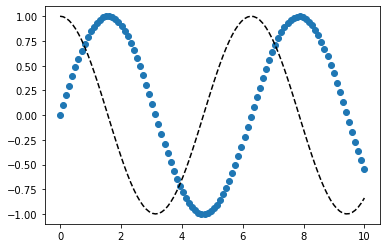

In [15]:
import numpy as np
x = np.linspace(0, 10, 100) # 0에서 10까지 균등한 간격으로 100개의 숫자를 만들라는 뜻이다.
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

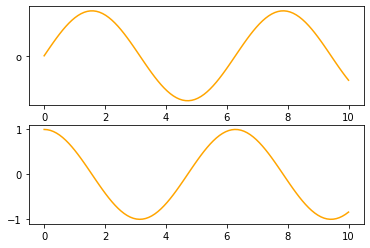

In [16]:
x = np.linspace(0, 10, 100)

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x), 'orange', 'o')

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x), 'orange')
plt.show()

### linestyle, marker 옵션
라인 스타일은 plot()의 인자로 들어가는데, 아래와 같이 다양한 방법으로 표기할 수 있다.

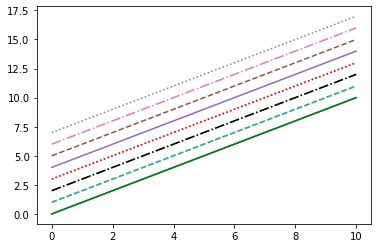

In [17]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

### Pandas로 그래프 그리기
Pandas도 `plot()` 메서드를 통해 여러 그래프를 그릴 수 있다.  
matplotlib와 연계해 사용하면 좋은데, 아래에 각 메서드의 기능을 정리했다.

#### pandas.plot 메서드 인자
- label : 그래프 범례 이름
- ax : 그래프를 그릴 matplotlib의 서브플롯 객체
- style : matplotlib에 전달할 'ko--' 같은 스타일의 문자열
- alpha : 투명도 (0~1)
- kind : 그래프의 종류 (line, bar, barh, kde)
- logy : y축에 대한 로그 스케일
- use_index : 객체의 색인을 눈금 이름으로 사용할지의 여부
- rot : 눈금 이름을 로테이션 (0~360)
- xticks, yticks : x축, y축으로 사용할 값
- xlim, ylim : x축, y축 한계
- grid : 축의 그리드 표시할지의 여부

#### pandas의 data가 DataFrame일 때 plot 메서드 인자
- subplots : 각 DataFrame의 컬럼을 독립된 서브플롯에 그린다.
- sharex : subplots=True면 같은 x축을 공유하고 눈금과 한계를 연결한다.
- sharey : subplots=True면 같은 y축을 공유한다.
- figsize : 그래프의 크기, 튜플로 지정
- title : 그래프의 제목을 문자열로 지정
- sort_columns : 컬럼을 알파벳 순서로 그린다.

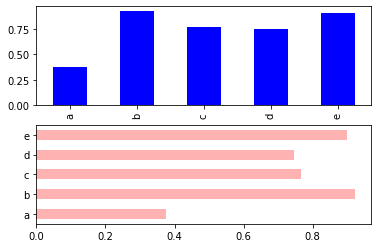

In [18]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)

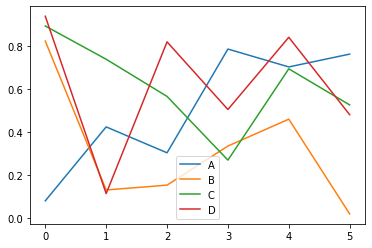

In [19]:
# 선 그래프도 그리는 방법은 비슷하다.
df = pd.DataFrame(np.random.rand(6, 4), columns=pd.Index(['A', 'B', 'C', 'D']))
df.plot(kind='line')

그래프 그리는 과정을 다시 정리해보자.
1. `fig = plt.figure()` : figure 객체를 선언해 '도화지를 펼쳐'준다.
2. `ax1 = fig.add_subplot(1, 1, 1)` : 축을 그린다.
3. `ax1.bar(x, y)` 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어준다.
4. 그래프 타이틀, 축의 레이블 등을 plt의 여러 메서드 `grid`, `xlabel`, `ylabel`을 이용해 추가한다.
5. `plt.savefig` 메서드를 이용해 저장한다.

In [20]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [21]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df.shape

(244, 7)

In [23]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [25]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


In [26]:
grouped = df['tip'].groupby(df['sex'])

In [27]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [28]:
grouped.size()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [29]:
import numpy as np
sex = dict(grouped.mean())  # 평균 데이터를 딕셔너리 형태로 바꾼다.
sex

{'Female': 2.833448275862069, 'Male': 3.0896178343949052}

In [30]:
x = list(sex.keys())
x

['Male', 'Female']

In [31]:
y = list(sex.values())
y

[3.0896178343949052, 2.833448275862069]

Text(0.5, 0, 'Tip by Sex')

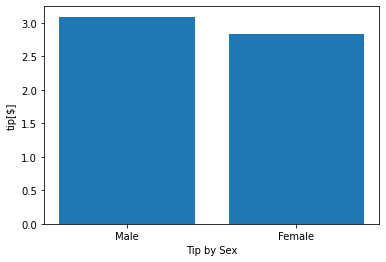

In [32]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.xlabel('Tip by Sex')

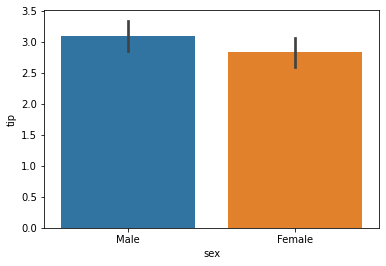

In [33]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by Sex')

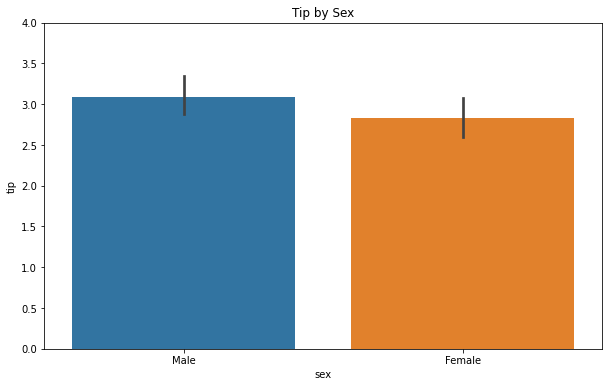

In [34]:
plt.figure(figsize=(10, 6)) # 도화지 사이즈 지정
sns.barplot(data=df, x='sex', y='tip')
plt.ylim(0, 4)
plt.title('Tip by Sex')

Text(0.5, 1.0, 'Tip by day')

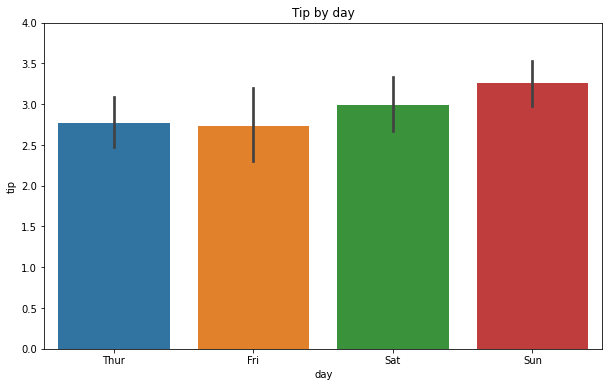

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title("Tip by day")

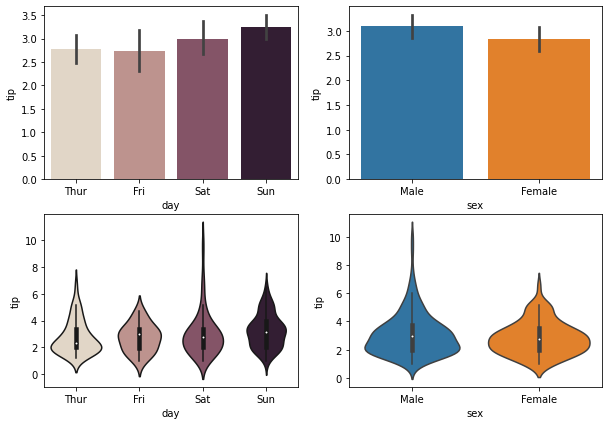

In [36]:
fig = plt.figure(figsize=(10, 7))

ax1 = fig.add_subplot(2, 2, 1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2, 2, 2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2, 2, 4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2, 2, 3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

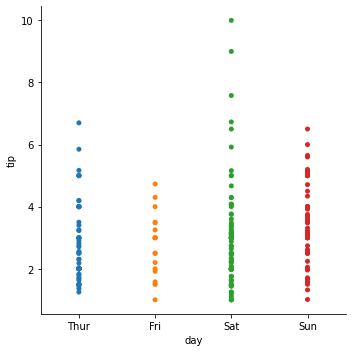

In [37]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

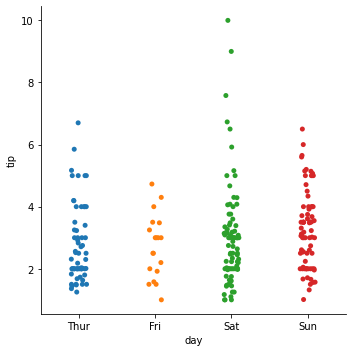

In [38]:
sns.catplot(x="day", y="tip", jitter=True, data=tips)

수치형 데이터를 나타내는데 가장 좋은 그래프는 산점도 혹은 선 그래프다.  
전체 음식 가격(`total_bill`)에 다른 `tip` 데이터를 시각화해 산점도와 선 그래프를 배워보자.

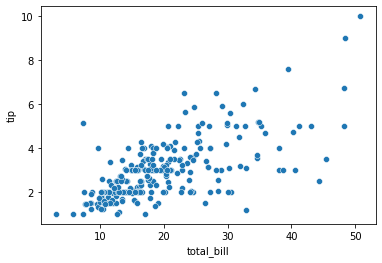

In [39]:
sns.scatterplot(data=df, x='total_bill', y='tip', palette="ch:r=-.2, d=.3_r")

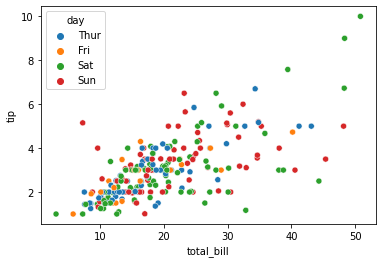

In [40]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

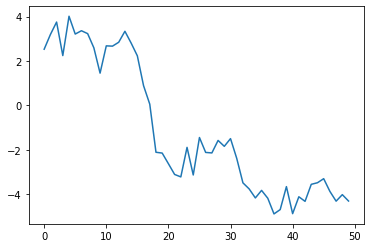

In [41]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수다.
# cumsum()은 누적합을 구하는 함수다.
plt.plot(np.random.randn(50).cumsum())

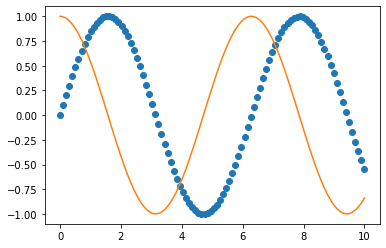

In [42]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

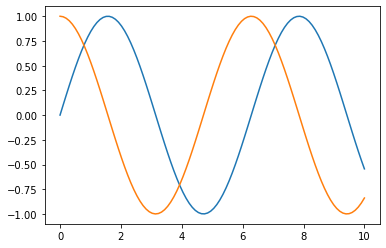

In [43]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

>히스토그램은 도수분포표를 그래프로 나타낸 것이다.  
다음과 같은 데이터의 히스토그램을 만들어보자.
- x1은 평균은 100이고 표준편차는 15인 정규분포를 따른다.
- x2는 평균은 130이고 표준편차는 15인 정규분포를 따른다.
- 도수를 50개의 구간으로 표시하며, 확률 밀도가 아닌 빈도로 표기한다.

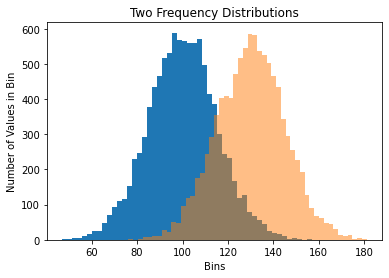

In [44]:
# 그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x를 총 50개 구간으로 나눈다는 뜻이다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래에 표시
ax1.yaxis.set_ticks_position('left')    # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()

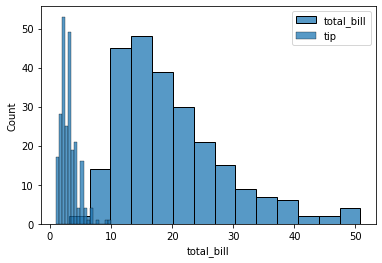

In [45]:
sns.histplot(df['total_bill'], label = 'total_bill')
sns.histplot(df['tip'], label='tip').legend() # legend()를 이용해 label 표시

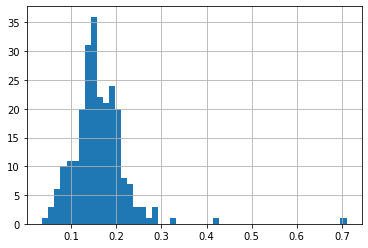

In [46]:
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins=50)

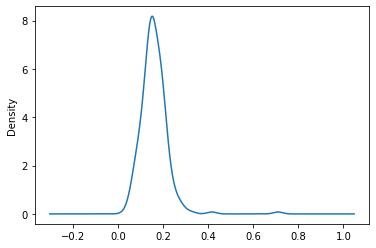

In [47]:
df['tip_pct'].plot(kind='kde')

`kind='kde'` 로 확률 밀도 그래프로 나타냈다.
- 밀도 그래프 : 연속된 확률분포를 나타낸다.  
  - 일반적으로는 kernels 메서드를 섞어서 이 분포를 근사하는 식으로 그린다.
  - 이것은 좀 더 단순하고 우리에게 친숙한 정규분포(가우시안)로 나타낼 수 있다.
  - 위 밀도 그래프는 KDE(Kernel Density Estimate) 커널 밀도 추정 그래프다.

In [48]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


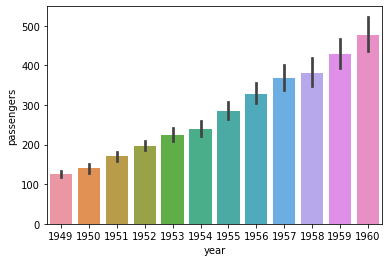

In [49]:
sns.barplot(data=flights, x='year', y='passengers')

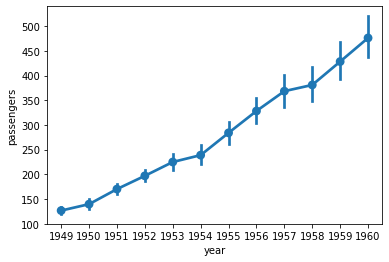

In [50]:
sns.pointplot(data=flights, x='year', y='passengers')

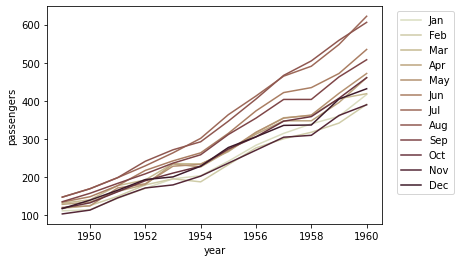

In [51]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')
plt.legend(bbox_to_anchor=(1.03, 1), loc=2) # legend 그래프 밖에 추가하기

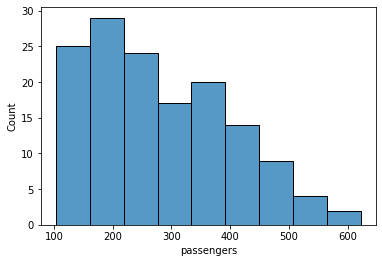

In [52]:
sns.histplot(flights['passengers'])

### Heatmap
Heatmap은 방대한 양의 데이터와 현상을 수치에 따른 색상으로 나타내는 것으로, 데이터 차원에 대한 제한은 없으나 모두 2차원으로 시각화해 표현한다.

예제 데이터의 연도와 달에 대해 탑승객 수를 heatmap으로 나타내보자.
>Heatmap을 그리기 위해 데이터를 pivot해야하는 경우가 있다.  
pivot이란 어떤 축, 점을 기준으로 바꾸다라는 뜻이다. 데이터 표를 재배치할 때도 pivot이라는 단어를 사용한다.

In [53]:
# pandas의 dataframedml pivot() 메서드를 사용한다.
# flights(DataFrame) 탑승객 수를 year와 month로 pivot해보자.

pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


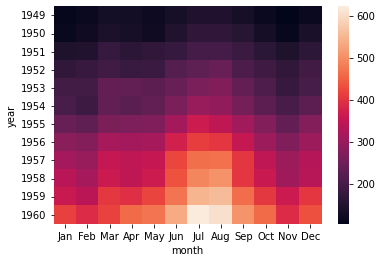

In [54]:
sns.heatmap(pivot)

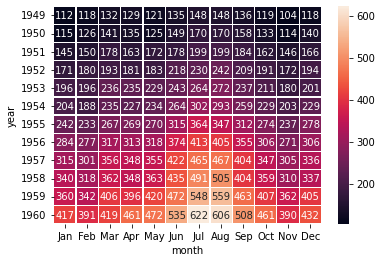

In [55]:
# 다양한 옵션을 줄 수 있다.
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

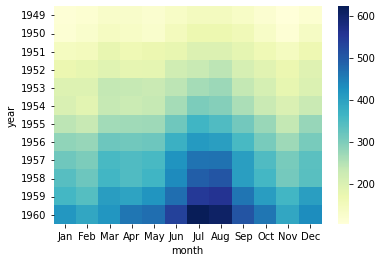

In [56]:
sns.heatmap(pivot, cmap="YlGnBu")